<a href="https://colab.research.google.com/github/MahmudGalib7/AI-Olympiad/blob/master/machine_learning/notebook/In_to_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import files
upload = files.upload()

Saving Dhaka_PM2.5_2018.csv to Dhaka_PM2.5_2018.csv
Saving Dhaka_PM2.5_2019.csv to Dhaka_PM2.5_2019.csv
Saving Dhaka_PM2.5_2020.csv to Dhaka_PM2.5_2020.csv
Saving Dhaka_PM2.5_2021.csv to Dhaka_PM2.5_2021.csv
Saving Dhaka_PM2.5_2022.csv to Dhaka_PM2.5_2022.csv


In [87]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
sample_data = {
    "hours" : [2, 3, 4, 5, 6, 8, 10, 12, 16],
    "exam_score" : [40, 50, 55, 60, 70, 80, 85, 90, 95]
}

In [ ]:
df = pd.DataFrame(sample_data)
x = df[['hours']]
y = df['exam_score']

In [ ]:
model = LinearRegression()
model.fit(x, y)
prediction = model.predict([[18]])
prediction[0]
model.coef_[0]
model.intercept_

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(40.25490196078431)

In [22]:
filelist = glob.glob('/content/*.csv')
filelist

['/content/Dhaka_PM2.5_2017.csv',
 '/content/Dhaka_PM2.5_2018.csv',
 '/content/Dhaka_PM2.5_2019.csv',
 '/content/Dhaka_PM2.5_2020.csv',
 '/content/Dhaka_PM2.5_2021.csv',
 '/content/Dhaka_PM2.5_2022.csv',
 '/content/Dhaka_PM2.5_2016.csv']

In [32]:
# read and combine
combined_files = []
for file in filelist:
  print(file)
  df = pd.read_csv(file)
  df['source_file'] = file.split('/')[-1]
  combined_files.append(df)

/content/Dhaka_PM2.5_2017.csv
/content/Dhaka_PM2.5_2018.csv
/content/Dhaka_PM2.5_2019.csv
/content/Dhaka_PM2.5_2020.csv
/content/Dhaka_PM2.5_2021.csv
/content/Dhaka_PM2.5_2022.csv
/content/Dhaka_PM2.5_2016.csv


In [39]:
data = pd.concat(combined_files, ignore_index=True) # creating Dataframe from Dataset

,Date (LT),Hour,NowCast Conc.,Raw Conc.,Conc. Unit,AQI,AQI Category,QC Name,source_file
0,01/01/2017 01:00,1,287.8,287,ug/m3,338,Hazardous,Valid,Dhaka_PM2.5_2017.csv
1,01/01/2017 02:00,2,297.4,307,ug/m3,347,Hazardous,Valid,Dhaka_PM2.5_2017.csv
2,01/01/2017 03:00,3,300.2,303,ug/m3,350,Hazardous,Valid,Dhaka_PM2.5_2017.csv
3,01/01/2017 04:00,4,306.1,312,ug/m3,356,Hazardous,Valid,Dhaka_PM2.5_2017.csv
4,01/01/2017 05:00,5,313.8,322,ug/m3,364,Hazardous,Valid,Dhaka_PM2.5_2017.csv


In [65]:
data.info() # Data structure
data.isna().sum() # Getting sum of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53355 entries, 0 to 53354
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_lt       53355 non-null  object 
 1   Hour          53355 non-null  int64  
 2   NowCast_Conc  53355 non-null  int64  
 3   raw_conc      53355 non-null  float64
 4   conc_unit     53355 non-null  object 
 5   AQI           53355 non-null  int64  
 6   AQI_category  51497 non-null  object 
 7   QC_name       53355 non-null  object 
 8   source_file   53355 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.7+ MB


In [47]:
data.rename(columns={
    "Date (LT)":"date_lt",
    "NowCast Conc.":"NowCast_Conc",
    "Raw Conc.":"raw_conc",
    "Conc. Unit": "conc_unit",
    "AQI Category": "AQI_category",
    "QC Name": "QC_name"
}, inplace=True) # renaming columns

In [67]:
data.head()

# data['raw_conc'] = data['raw_conc'].astype('int64') # Converting data type
data['raw_conc'] = pd.to_numeric(data['raw_conc'], errors="coerce")
data['NowCast_Conc'] = pd.to_numeric(data['NowCast_Conc'], errors="coerce")
data['AQI'] = pd.to_numeric(data['AQI'], errors="coerce")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53355 entries, 0 to 53354
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_lt       53355 non-null  object 
 1   Hour          53355 non-null  int64  
 2   NowCast_Conc  53355 non-null  int64  
 3   raw_conc      53355 non-null  float64
 4   conc_unit     53355 non-null  object 
 5   AQI           53355 non-null  int64  
 6   AQI_category  51497 non-null  object 
 7   QC_name       53355 non-null  object 
 8   source_file   53355 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.7+ MB


In [85]:
data = data.dropna()
data.describe()
data.isnull()

,level_0,index,date_lt,Hour,NowCast_Conc,raw_conc,conc_unit,AQI,AQI_category,QC_name,source_file
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
51492,False,False,False,False,False,False,False,False,False,False,False
51493,False,False,False,False,False,False,False,False,False,False,False
51494,False,False,False,False,False,False,False,False,False,False,False
51495,False,False,False,False,False,False,False,False,False,False,False


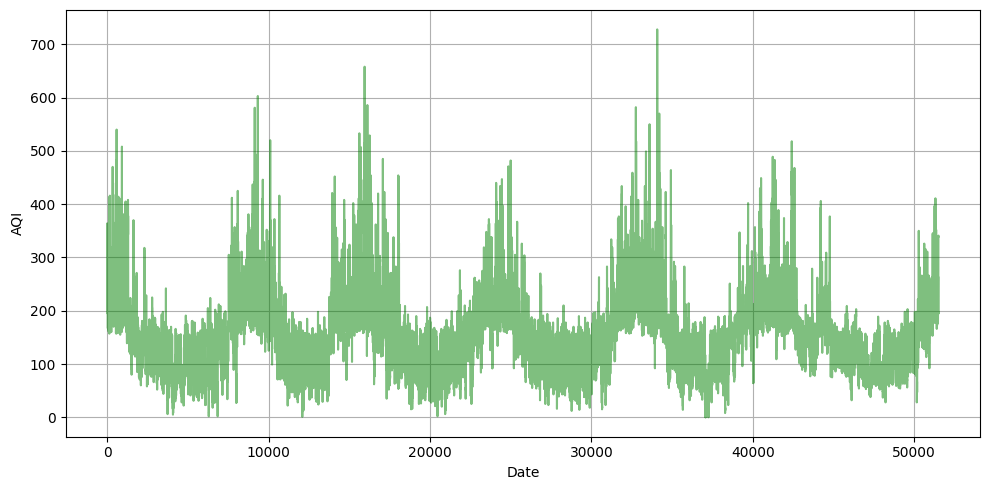

In [105]:
plt.figure(figsize=(10,5))
plt.plot(data.index, data['AQI'], color="green", alpha=0.5)
plt.grid()
plt.xlabel("Date")
plt.ylabel("AQI")
plt.tight_layout()

HW -> Draw a graph based on the AQI's avg over the years